In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("CAR_DEKHO.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 1)From which manufacturing year to which year vehicles are present in this data?

In [46]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 2) What is the lowest price that a vehicle is sold?

In [47]:
df["Selling_Price"].min()

0.1

# 3) What is the highest price that a vehicle is sold?

In [48]:
df["Selling_Price"].max()

35.0

# 4)How many records are there in this data?

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 5) Are there any missing values in this data?

In [50]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# 6) How many different vehicles are present in this data?

In [51]:
df["Car_Name"].nunique()

98

# 7) Which is the most sold vehicle in this data?

In [52]:
df["Car_Name"].mode()

0    city
Name: Car_Name, dtype: object

# 8) Does the database include any CNG vehicle?

In [53]:
(df["Fuel_Type"]=="CNG").sum()

2

In [54]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

# 9) How many vehicles sold out by individuals?

In [55]:
(df["Seller_Type"]=="Individual").sum()

106

# 10) Does this data contain Auto transmission vehicle?

In [56]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [57]:
(df["Transmission"]=="Automatic").sum()

40

# 11) How many single person owned vehicles are there?

In [58]:
df["Owner"].unique()

array([0, 1, 3])

In [59]:
(df["Owner"]==1).sum()

10

# 12) Which is the most and least cost depreciated vehicle in data?

In [60]:
df["depriciated"]=df["Present_Price"]-df["Selling_Price"]
df[df.depriciated==df.depriciated.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6


In [61]:
df[df.depriciated==df.depriciated.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03


# 13)Which brands of vehicles are less affected by cost depreciation ?

In [62]:
df['Brand'] = df['Car_Name'].str.split().str[0]
avg_depriciated = df.groupby('Brand')['depriciated'].mean().reset_index()
avg_depriciated_sorted = avg_depriciated.sort_values(by='depriciated')
print(avg_depriciated_sorted)

       Brand  depriciated
11        UM     0.120000
1     Activa     0.183333
10       TVS     0.242750
7   Mahindra     0.250000
12    Yamaha     0.258750
3       Hero     0.265200
4      Honda     0.318824
9     Suzuki     0.330000
2      Bajaj     0.334400
8      Royal     0.423529
41    vitara     0.580000
6        KTM     0.745000
28     grand     0.756250
31     ignis     0.810000
13      alto     1.166667
16      brio     1.299000
35      omni     1.440000
29       i10     1.506000
24       eon     1.530000
21     creta     1.800000
38     swift     1.802000
0        800     1.930000
42     wagon     1.937500
15    baleno     2.020000
5    Hyosung     2.100000
37         s     2.110000
43     xcent     2.163333
18      ciaz     2.284444
33      jazz     2.328571
30       i20     2.438889
36      ritz     2.475000
14     amaze     2.564286
26     etios     2.848182
25    ertiga     2.848333
22     dzire     3.157500
23   elantra     3.190000
40     verna     3.292143
19      city

#14) Are there any factors which you feel affect the cost depreciation ?
# It may depend on Seller_Type

In [63]:
df.groupby("Seller_Type")["depriciated"].mean()

Seller_Type
Dealer        4.164615
Individual    0.764340
Name: depriciated, dtype: float64

# 15) In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

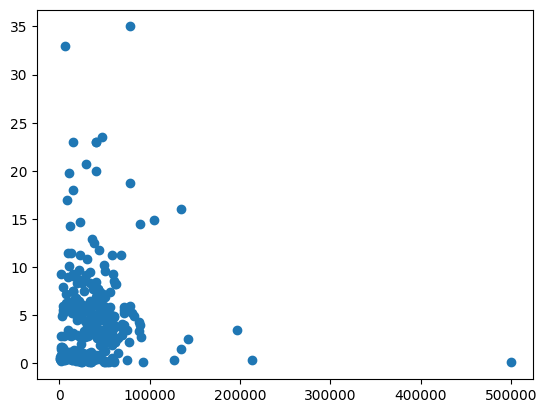

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df.Kms_Driven,df.Selling_Price)
plt.xlabel = "Kilometers Driven"
plt.ylabel = "Selling Price  in Lakhs"
plt.title = "Selling price vs Kilometers Driven"
plt.show()

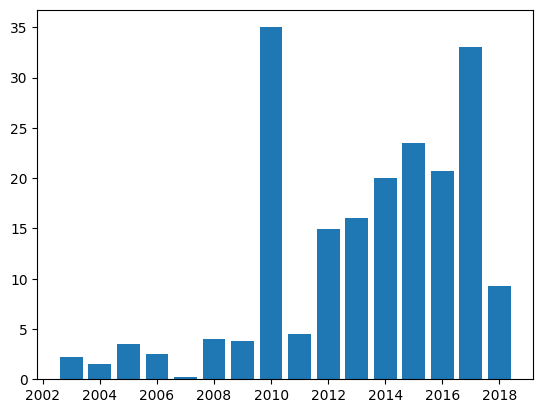

In [65]:
plt.bar(df.Year,df.Selling_Price)
plt.xlabel = "Age of vehicle"
plt.ylabel = "Selling Price  in Lakhs"
plt.title = "Selling price vs Age of vehicle"
plt.show()

# 16) Can we get idea about newest vehicles i.e. after 2014 manufactured ?

In [66]:
new_vehicles=df[df["Year"]>2014]
new_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,ciaz
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,vitara
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37,ciaz
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11,s
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14,ciaz



# 17) Can we find out data of only two wheelers from this data?Which is the oldest bike sold here ?

In [67]:
two_wheelers=df[df["Present_Price"]<2]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15,Royal
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,UM
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,KTM
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,Bajaj
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,Royal


# 18) Which is the newest bike sold here?

In [68]:
two_wheelers.loc[two_wheelers.Year==two_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,UM
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,KTM
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,Bajaj
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,Royal
109,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0,0.27,Royal
126,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,0.05,Bajaj
128,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0,0.07,Honda
129,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0,0.06,Yamaha
130,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0,0.12,Honda
132,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,0.20,Bajaj


# 19) Which is the most sold bike here?

In [69]:
two_wheelers["Car_Name"].mode()

0    Royal Enfield Classic 350
Name: Car_Name, dtype: object

# 20) Do you find any deal in two wheelers which exceeded the general expectation ?

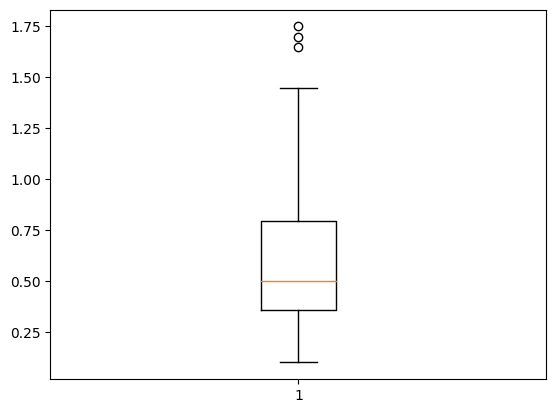

In [37]:
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

# 21) Can we find out data of only cars from this data ?

In [70]:
cars=df[df["Selling_Price"]>2]
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,swift
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10,city
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90,brio
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65,city
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00,city


# 22) Which is the oldest car sold here?

In [71]:
cars.loc[cars.Year==cars.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73,sx4


# 23) Which is the newest car sold here?

In [72]:
cars.loc[cars.Year==cars.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciated,Brand
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,vitara


# 24) Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

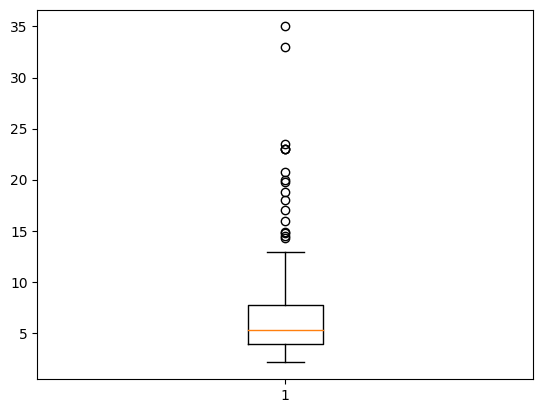

In [73]:
plt.boxplot(cars.Selling_Price)
plt.show()